In [3]:
import sys

sys.path.insert(1, 'C:/Users/peter/Desktop/volatility-forecasting/midas')

from volatility import Panel_GARCH
import pandas as pd
import numpy as np
from datetime import timedelta, datetime
from monthdelta import monthdelta
import time
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
ret_matrix = pd.read_csv('C:/Users/peter/Desktop/volatility-forecasting/results/ret_matrix.csv')
ret_matrix.set_index(pd.to_datetime(ret_matrix.Date), inplace = True)
ret_matrix = ret_matrix.iloc[:, 1:]

ret_mat = ret_matrix.iloc[1:, :]
nan_cols = np.where(ret_mat.isna().sum().values == 1)[0]
nan_index = np.where(ret_mat.iloc[:, nan_cols].isna() == True)[0]

if len(set(nan_index)) == 1.0:
    ret_mat = ret_mat.drop([ret_mat.index[nan_index[0]]])

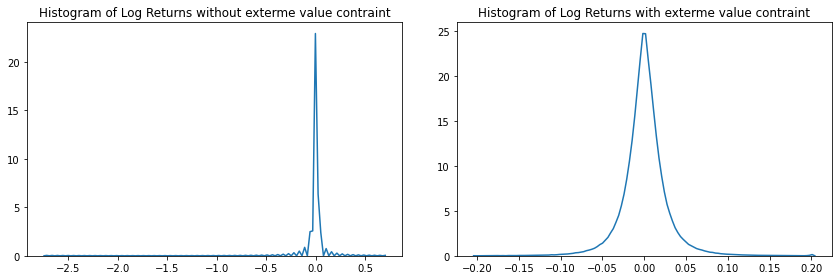

In [17]:
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
y = ret_mat[(ret_mat.index >= datetime(1999,12,1) + monthdelta(0)) & (ret_mat.index < datetime(2005, 1, 1) + monthdelta(0))]

sns.kdeplot(y.stack().values, ax = ax[0])
ax[0].set_title('Histogram of Log Returns without exterme value contraint')

y_new = y
for j in range(len(y.columns)):
    y_new = y_new.replace(y.iloc[np.where(y_new.iloc[:, j].values >= 0.2)[0], j].values, 0.2) # A 20-nál nagyobb értékeket 20ra állítom
    y_new = y_new.replace(y.iloc[np.where(y_new.iloc[:, j].values <= -0.2)[0], j].values, -0.2) # A -20-nál kisebb értékeket -20ra állítom

sns.kdeplot(y_new.stack().values, ax = ax[1])
ax[1].set_title('Histogram of Log Returns with exterme value contraint')

plt.tight_layout()
plt.show()

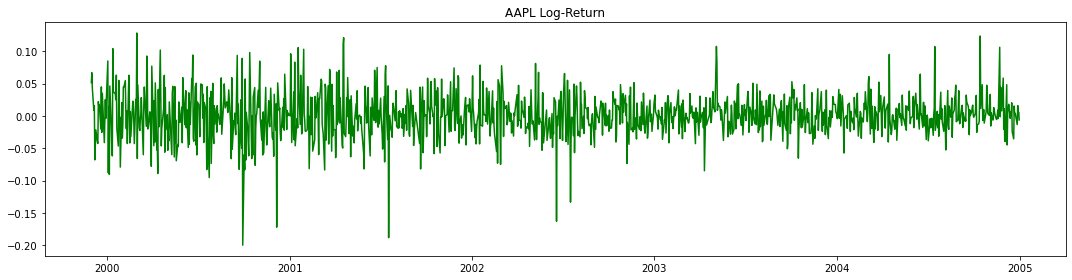

In [11]:
plt.figure(figsize = (15, 4))
plt.plot(pd.to_datetime(y.index), y.AAPL, 'g')
plt.title('AAPL Log-Return')
plt.tight_layout()
plt.show()

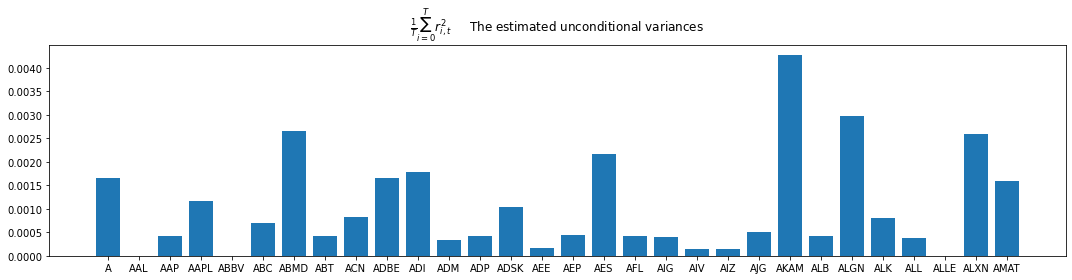

In [12]:
#Ezzel a kezdőértékkel indul meg a sigma2 számolása
plt.figure(figsize= (15,4))
plt.bar(y.columns[:30], np.nanmean(y ** 2, axis = 0)[:30])
plt.title(r'$\frac{1}{T} \sum_{i=0}^T r_{i,t}^2$' + '\t The estimated unconditional variances')
plt.tight_layout()
plt.show()

In [ ]:
model = Panel_GARCH()

##### Az extrém értékek kiszűrése nélkül futtatott model:

In [18]:
model.fit(['01', '01'], y)

Loglikelihood:  -947.4091306876135 

     Parameters  Standard Error  95% CI Lower  95% CI Higher
0  1.867219e-13        0.009200     -0.018032       0.018032
1  1.000000e+00        0.014073      0.972418       1.027582


###### Az extrém értékek korlátozásával futtatott model:

In [14]:
model.fit(['01', '01'], y_new)

Loglikelihood:  -955.4157812156991 

     Parameters  Standard Error  95% CI Lower  95% CI Higher
0  1.327691e-09        0.005172     -0.010138       0.010138
1  1.000000e+00        0.006954      0.986370       1.013630


##### Ha 100-zal beszorozzuk akkor:

In [16]:
model.fit(['01', '01'], y_new * 100)

Loglikelihood:  955.7298460375661 

     Parameters  Standard Error  95% CI Lower  95% CI Higher
0  1.419957e-09        0.005179     -0.010150       0.010150
1  1.000000e+00        0.006965      0.986348       1.013652
